<a href="https://colab.research.google.com/github/StudentHagal/Thesis/blob/main/RUL_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0) Preparation

## Load Requirements

In [1]:
# Github repository
!git clone https://github.com/StudentHagal/Thesis.git

# Libraries
import sys
import pandas as pd
import hashlib
import matplotlib
import numpy as np
import pandas as pd
import sklearn
import joblib
import scipy
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


#Extension
!pip install ipython-autotime
%load_ext autotime

print('load completed')


Cloning into 'Thesis'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 145 (delta 51), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (145/145), 4.77 MiB | 3.31 MiB/s, done.
Resolving deltas: 100% (51/51), done.
load completed
time: 2.98 ms (started: 2021-10-07 16:09:24 +00:00)


## Check Lib Version

In [2]:
# Check the versions of libraries
# !!! WARNING !!!
# Important because model result may be different for other version
 
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('joblib: {}'.format(joblib.__version__))

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1
joblib: 1.0.1
time: 7.16 ms (started: 2021-10-07 16:09:24 +00:00)


## Global variables

In [3]:
# Global Variables declaration

#known hash value of file
compare = '10f68054068bc4ac4d7fee65e8fd7a184151e3ce3abce5d85350fc13c412d93b' 
#Stored file path                     
raw_file = "/content/Thesis/Resources/database.csv"
#environment path
main_dir = '/content/Thesis/'           
model_dir = '/content/Thesis/Resources/models/'                                  
process_dir = '/content/Thesis/Resources/Processed/'                                
#Column names for dataset            
col_names = ['No', 'Datetime', 'Control_Mode', 'L1', 'L2', 'L3', 'Frequency', 'kVA_Total',           
             'kVA_L1', 'kVA_L2', 'kVA_L3', 'KVAr', 'Oil_Pressure', 'Coolant_Temp', 
             'Charger_Alternator', 'PF_Avg', 'PF_L1', 'PF_L2', 
             'PF_L3', 'L1_N', 'L2_N', 'L3_N', 'Source_Ext_Voltage', 'ECU_Temp', 
             'RPM', 'Train_code']
df = pd.read_csv(raw_file, names=col_names)
features = ['Oil_Pressure', 'Coolant_Temp', 'PF_Avg', 'ECU_Temp']
#Unused columns in dataset
unused_col = ['No', 'Control_Mode', 'L1', 'L2', 'L3', 'Frequency',                       
              'kVA_Total', 'kVA_L1', 'kVA_L2', 'kVA_L3', 'KVAr', 'Charger_Alternator',
              'RPM', 'PF_L1', 'PF_L2', 'PF_L3', 'L1_N','L2_N', 'L3_N',
              'Source_Ext_Voltage']

#Threshold value variable 40% min, 60% max for labelling
oil_threshold_40, oil_threshold_60 = df.Oil_Pressure.quantile([0.4 , 0.6])
coolant_threshold_40, coolant_threshold_60 = df.Coolant_Temp.quantile([0.4 , 0.6])
pf_threshold_40, pf_threshold_60 = df.PF_Avg.quantile([0.4 , 0.6])
ecu_threshold_40, ecu_threshold_60 = df.ECU_Temp.quantile([0.4 , 0.6])
#Threshold value variable 25% min, 75% max for labelling
oil_threshold_25, oil_threshold_75 = df.Oil_Pressure.quantile([0.25 , 0.75])
coolant_threshold_25, coolant_threshold_75 = df.Coolant_Temp.quantile([0.25 , 0.75])
pf_threshold_25, pf_threshold_75 = df.PF_Avg.quantile([0.25 , 0.75])
ecu_threshold_25, ecu_threshold_75 = df.ECU_Temp.quantile([0.25 , 0.75])

#Algorithm Selection
model_RFreg = RandomForestRegressor(random_state=1)
model_OLS = LinearRegression()
model_Ridge = Ridge()

#Model Evaluation var
val_results = []
names = []
models = []
models.append(('OLS', model_OLS))
models.append(('Ridge', model_Ridge))
models.append(('RF-reg', model_RFreg))

time: 209 ms (started: 2021-10-07 16:09:24 +00:00)


## Hash Check Function

In [4]:
# Function that returns the SHA-2 hash of the file
def hash_file(filepath):

   # make a hash object with SHA-2
   h = hashlib.sha256()

   # open file for reading in binary mode
   with open(filepath,'rb') as file:
       # loop till the end of the file
       chunk = 0
       while chunk != b'':
           # read only 1024 bytes at a time
           chunk = file.read(1024)
           h.update(chunk)

   # return the hex representation of digest
   return h.hexdigest()


time: 7.12 ms (started: 2021-10-07 16:09:24 +00:00)


# 1) Standardized Dataset

## Hash Validation

In [5]:
# Checking hash value of all vehicles dataset file
message = hash_file(process_dir+'all_vehicles.csv')
print('SHA-256 value of all vehicles dataset file is :')
print(message)

# Checking hash value of ML labeled dataset file
message = hash_file(process_dir+'predict1_smote.csv')
print('SHA-256 value of ML labeled dataset file is :')
print(message)

SHA-256 value of all vehicles dataset file is :
befb8ea34ab0546b9439d8ed4b346c014ff33748d6191e335e9c6c0e406ba403
SHA-256 value of ML labeled dataset file is :
43699538897111fbbfc3739cbbcb383c21b403042706dc9a8410a9bd7b5ca2e5
time: 28.8 ms (started: 2021-10-07 16:09:24 +00:00)


## All vehicles

In [6]:
#load dataset for all vehicles
df_allvehicles = pd.read_csv(process_dir+'all_vehicles.csv', index_col=0)
#df_allvehicles.drop(labels='Unnamed: 0', axis=1, inplace=True)
MTBF_allvehicles = df_allvehicles.Delta_Time_h.mean()
df_allvehicles

,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Label,Train_code,diffs,Delta_Time_h
14136,2020-01-04 00:00:00,624.0,78.0,0.87,37.0,Maintenance,P-01818,0 days 00:00:00,0.000000
14137,2020-01-04 01:00:00,624.0,77.0,0.87,37.0,Maintenance,P-01818,0 days 01:00:00,1.000000
14139,2020-01-04 03:00:00,620.0,78.0,0.89,39.0,Maintenance,P-01818,0 days 02:00:00,2.000000
2936,2020-01-04 07:00:00,620.0,82.0,0.89,43.0,Maintenance,P-01801,0 days 04:00:00,4.000000
20706,2020-01-04 08:00:00,624.0,79.0,0.87,38.0,Maintenance,P-01822,0 days 01:00:00,1.000000
...,...,...,...,...,...,...,...,...,...
17366,2021-12-03 07:02:00,616.0,82.0,0.88,36.0,Maintenance,P-01820,0 days 03:02:00,3.033333
6349,2021-12-03 18:00:00,620.0,80.0,0.84,38.0,Maintenance,P-01808,0 days 10:58:00,10.966667
17380,2021-12-03 21:00:00,612.0,82.0,0.88,41.0,Maintenance,P-01820,0 days 03:00:00,3.000000
17381,2021-12-03 22:00:00,616.0,82.0,0.85,38.0,Maintenance,P-01820,0 days 01:00:00,1.000000


time: 59.1 ms (started: 2021-10-07 16:09:24 +00:00)


In [7]:
df_allvehicles.describe()

,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Delta_Time_h
count,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000
mean,612.411929,80.450140,0.859329,41.253262,3.914026
std,8.840592,1.651418,0.026699,3.383639,32.081543
min,592.000000,76.000000,0.780000,36.000000,0.000000
25%,608.000000,79.000000,0.850000,38.000000,1.000000
50%,616.000000,81.000000,0.870000,41.000000,1.000000
75%,620.000000,82.000000,0.880000,44.000000,1.133333
max,624.000000,82.000000,0.890000,48.000000,676.500000


time: 41.2 ms (started: 2021-10-07 16:09:24 +00:00)


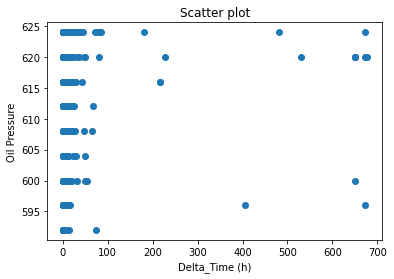

time: 208 ms (started: 2021-10-07 16:09:24 +00:00)


In [8]:
# Simple Scatterplot
plt.scatter(df_allvehicles.Delta_Time_h, df_allvehicles.Oil_Pressure)
plt.title('Scatter plot')
plt.xlabel('Delta_Time (h)')
plt.ylabel('Oil Pressure')
plt.show()

## Single vehicle

In [9]:
#Preprocess data of a single vehicle
df_single = df_allvehicles.loc[df_allvehicles['Train_code'] == 'P-01908']
MTBF_single = df_single.Delta_Time_h.mean()
df_single

,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Label,Train_code,diffs,Delta_Time_h
28123,2020-01-10 04:04:00,616.0,81.0,0.86,38.0,Maintenance,P-01908,0 days 02:04:00,2.066667
28124,2020-01-10 05:00:00,616.0,81.0,0.88,39.0,Maintenance,P-01908,0 days 00:56:00,0.933333
28125,2020-01-10 06:00:00,612.0,81.0,0.85,42.0,Maintenance,P-01908,0 days 01:00:00,1.000000
28126,2020-01-10 07:00:00,612.0,81.0,0.87,44.0,Maintenance,P-01908,0 days 01:00:00,1.000000
28147,2020-01-11 15:00:00,612.0,81.0,0.87,38.0,Maintenance,P-01908,0 days 05:00:00,5.000000
...,...,...,...,...,...,...,...,...,...
29494,2021-12-01 08:00:00,616.0,81.0,0.86,44.0,Maintenance,P-01908,0 days 02:00:00,2.000000
29495,2021-12-01 09:00:00,612.0,81.0,0.86,45.0,Maintenance,P-01908,0 days 01:00:00,1.000000
29496,2021-12-01 10:00:00,608.0,82.0,0.87,46.0,Maintenance,P-01908,0 days 01:00:00,1.000000
29497,2021-12-01 11:00:00,604.0,82.0,0.87,46.0,Maintenance,P-01908,0 days 01:00:00,1.000000


time: 55.4 ms (started: 2021-10-07 16:09:25 +00:00)


In [10]:
df_single.describe()

,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Delta_Time_h
count,426.000000,426.000000,426.000000,426.000000,426.000000
mean,616.779343,80.319249,0.869812,40.532864,7.365023
std,4.603134,1.087449,0.016131,3.001976,56.634380
min,604.000000,77.000000,0.790000,36.000000,0.033333
25%,612.000000,80.000000,0.860000,38.000000,1.000000
50%,616.000000,80.000000,0.870000,40.000000,1.000000
75%,620.000000,81.000000,0.880000,43.000000,2.000000
max,624.000000,82.000000,0.890000,48.000000,672.883333


time: 41.7 ms (started: 2021-10-07 16:09:25 +00:00)


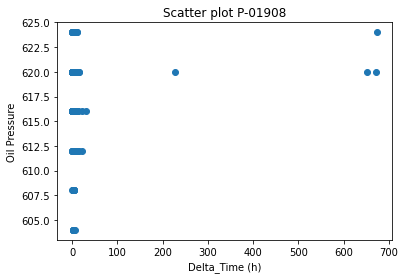

time: 183 ms (started: 2021-10-07 16:09:25 +00:00)


In [11]:
# Simple Scatterplot
plt.scatter( df_single.Delta_Time_h, df_single.Oil_Pressure)
plt.title('Scatter plot P-01908')
plt.xlabel('Delta_Time (h)')
plt.ylabel('Oil Pressure')
plt.show()

## ML Label

In [12]:
#Preprocess dataset from ML classifier
df_MLlabel = pd.read_csv(process_dir+'predict1_smote.csv')
dropped_col = ['Unnamed: 0','LR', 'KNN', 'SVM', 'RF', 'LDA', 'NB']
df_MLlabel.drop(labels=dropped_col, axis=1, inplace=True)
df_MLlabel = df_MLlabel.loc[df_MLlabel['DT'] == 'Maintenance']
df_MLlabel['Datetime'] = pd.to_datetime(df_MLlabel.Datetime)
df_MLlabel = df_MLlabel.sort_values(by='Datetime')
df_MLlabel['Delta_Time'] = df_MLlabel.Datetime.diff()
df_MLlabel = df_MLlabel.fillna(pd.Timedelta(seconds=0))
df_MLlabel['Delta_Time_h'] = df_MLlabel['Delta_Time']/np.timedelta64(1,'h')
MTBF_MLlabel = df_MLlabel.Delta_Time_h.mean()
df_MLlabel

,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Train_code,DT,Delta_Time,Delta_Time_h
20361,2020-01-04 00:00:00,572.0,78.0,0.74,40.0,P-01822,Maintenance,0 days 00:00:00,0.000000
13889,2020-01-04 00:00:00,624.0,78.0,0.87,37.0,P-01818,Maintenance,0 days 00:00:00,0.000000
13890,2020-01-04 01:00:00,624.0,77.0,0.87,37.0,P-01818,Maintenance,0 days 01:00:00,1.000000
13891,2020-01-04 02:00:00,628.0,77.0,0.86,36.0,P-01818,Maintenance,0 days 01:00:00,1.000000
13892,2020-01-04 03:00:00,620.0,78.0,0.89,39.0,P-01818,Maintenance,0 days 01:00:00,1.000000
...,...,...,...,...,...,...,...,...,...
21408,2021-12-02 06:00:00,620.0,77.0,0.88,35.0,P-01822,Maintenance,0 days 06:22:00,6.366667
21409,2021-12-02 07:00:00,616.0,78.0,0.87,42.0,P-01822,Maintenance,0 days 01:00:00,1.000000
21410,2021-12-02 08:00:00,620.0,78.0,0.87,42.0,P-01822,Maintenance,0 days 01:00:00,1.000000
21417,2021-12-02 15:00:00,616.0,78.0,0.86,46.0,P-01822,Maintenance,0 days 07:00:00,7.000000


time: 143 ms (started: 2021-10-07 16:09:25 +00:00)


In [13]:
df_MLlabel.describe()

,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Delta_Time,Delta_Time_h
count,2778.000000,2778.000000,2778.000000,2778.000000,2778,2778.000000
mean,984.698344,77.520878,1.369950,1076.606911,0 days 06:02:09.589632829,6.035997
std,4914.412854,0.499654,13.064565,5732.717568,1 days 17:52:20.903698116,41.872473
min,0.000000,77.000000,0.000000,26.000000,0 days 00:00:00,0.000000
25%,620.000000,77.000000,0.820000,37.000000,0 days 00:35:15,0.587500
50%,628.000000,78.000000,0.860000,40.000000,0 days 01:00:00,1.000000
75%,636.000000,78.000000,0.880000,43.000000,0 days 02:00:00,2.000000
max,65531.000000,78.000000,327.650000,32767.000000,28 days 22:55:00,694.916667


time: 41.6 ms (started: 2021-10-07 16:09:25 +00:00)


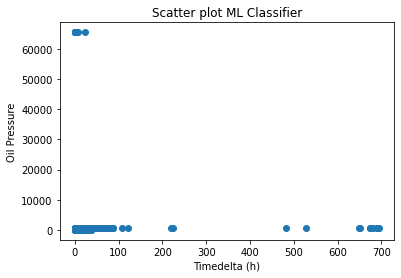

time: 205 ms (started: 2021-10-07 16:09:25 +00:00)


In [14]:
# Simple Scatterplot
plt.scatter(df_MLlabel.Delta_Time_h,df_MLlabel.Oil_Pressure )
plt.title('Scatter plot ML Classifier')
plt.xlabel('Timedelta (h)')
plt.ylabel('Oil Pressure')
plt.show()

# 3) Model Training

## Dataset Split

In [15]:
#Data splitting

#separate feature (X) and predicted (y) parameters for all vehicles
X = df_allvehicles[features]
y = df_allvehicles['Delta_Time_h']

#separate feature (X) and predicted (y) parameters for single vehicle
X1 = df_single[features]
y1 = df_single['Delta_Time_h']

#separate feature (X) and predicted (y) parameters for ML classifier
X2 = df_MLlabel[features]
y2 = df_MLlabel['Delta_Time_h']

time: 9.12 ms (started: 2021-10-07 16:09:25 +00:00)


In [16]:
# Split-out training and test dataset for all vehicles
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=1)
print('Training data size = ', X_train.shape)
print('Testing data size = ', X_test.shape)

# Split-out training and test dataset for single vehicle
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y1, test_size=0.20, 
                                                    random_state=1)
print('Training data size (single vehicle) = ', X1_train.shape)
print('Testing data size (single vehicle) = ', X1_test.shape)

# Split-out training and test dataset for ML classifier
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, y2, test_size=0.20, 
                                                    random_state=1)
print('Training data size (ML Classifier) = ', X2_train.shape)
print('Testing data size (ML Classifier) = ', X2_test.shape)

print('Data split completed')

Training data size =  (3433, 4)
Testing data size =  (859, 4)
Training data size (single vehicle) =  (340, 4)
Testing data size (single vehicle) =  (86, 4)
Training data size (ML Classifier) =  (2222, 4)
Testing data size (ML Classifier) =  (556, 4)
Data split completed
time: 23.1 ms (started: 2021-10-07 16:09:25 +00:00)


## Model Training & Validation

OLS: -4.732938 (1.283825)
Ridge: -4.710381 (1.294073)
RF-reg: -5.253497 (1.606916)


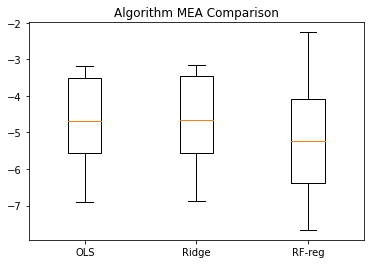

time: 5.07 s (started: 2021-10-07 16:09:25 +00:00)


In [17]:
# Cross validation of each model training in turn
# Change variable X_train and Y_train if using other dataset (Check Dataset Split part for variables used)
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')	
 #MEA scoring will be shown in negative, due to how cross_val_score scoring function works. The closer to 0 is better
	val_results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare result
pyplot.boxplot(val_results, labels=names)
pyplot.title('Algorithm MEA Comparison')
pyplot.show()

In [18]:
# Re-train each algorithm using whole training dataset for better model
# Change variable X_train and Y_train if using other dataset
# Each model is separated in different code block for easier tracking of Runtime
model_OLS.fit(X_train, Y_train)
joblib.dump(model_OLS, model_dir+'model_OLS.joblib')

['/content/Thesis/Resources/models/model_OLS.joblib']

time: 12.8 ms (started: 2021-10-07 16:09:30 +00:00)


In [19]:
model_Ridge.fit(X_train, Y_train)
joblib.dump(model_Ridge, model_dir+'model_Ridge.joblib')

['/content/Thesis/Resources/models/model_Ridge.joblib']

time: 15.5 ms (started: 2021-10-07 16:09:30 +00:00)


In [20]:
model_RFreg.fit(X_train, Y_train)
joblib.dump(model_RFreg, model_dir+'model_RFreg.joblib')

['/content/Thesis/Resources/models/model_RFreg.joblib']

time: 643 ms (started: 2021-10-07 16:09:30 +00:00)


# 4) Model Testing

In [21]:
#RUL result is MTBF_dataset-Prediction
#Change MTBF_dataset and Y_test variable depend on dataset: 
#MTBF_allvehicles, Y_test for All vehicles dataset, 
#MTBF_single, Y1_test for Single vehicle dataset, 
#MTBF_MLlabel, Y2_test for ML labelled dataset

predictions_OLS = MTBF_allvehicles-model_OLS.predict(X_test)
print('OLS MEA Result:')
print(mean_absolute_error(Y_test, predictions_OLS))

OLS MEA Result:
5.135236893716892
time: 8.44 ms (started: 2021-10-07 16:09:31 +00:00)


In [22]:
predictions_Ridge = MTBF_allvehicles-model_Ridge.predict(X_test)
print('Ridge MEA Result:')
print(mean_absolute_error(Y_test, predictions_Ridge))

Ridge MEA Result:
5.098606484079501
time: 6.83 ms (started: 2021-10-07 16:09:31 +00:00)


In [23]:
predictions_RFreg = MTBF_allvehicles-model_RFreg.predict(X_test)
print('RF-Reg MEA Result:')
print(mean_absolute_error(Y_test, predictions_RFreg))

RF-Reg MEA Result:
6.423420580520167
time: 32.5 ms (started: 2021-10-07 16:09:31 +00:00)


In [24]:
df_RUL = pd.DataFrame({'OLS': predictions_OLS, 'Ridge': predictions_Ridge,
                         'RF-reg':predictions_RFreg})
df_RUL

,OLS,Ridge,RF-reg
0,-1.833904,-1.614103,-2.617738
1,-0.611197,-0.565618,0.728836
2,-2.711277,-2.463635,-145.076350
3,2.726215,2.345269,2.936193
4,-2.035265,-1.858111,2.256976
...,...,...,...
854,-0.826060,-0.863113,2.090934
855,0.804459,0.938550,-0.834198
856,2.326497,2.270112,2.914026
857,0.658862,0.792806,2.624096


time: 25.3 ms (started: 2021-10-07 16:09:31 +00:00)
